In [ ]:
#Synchronous machine dataset
#dataset obtained in http://archive.ics.uci.edu/ml/datasets/Synchronous+Machine+Data+Set

#Citation Request:
#1) Kahraman, H. T. (2014). Metaheuristic linear modeling technique for estimating the excitation current of a synchronous motor.Â Turkish Journal of Electrical Engineering & Computer Sciences,Â 22(6), 1637-1652.
#2) Kahraman, H. T., Bayindir, R, & Sagiroglu, S. (2012). A new approach to predict the excitation current and parameter weightings of synchronous machines based on genetic algorithm-based k-NN estimator.Â Energy Conversion and Management,Â 64, 129-138.

In [ ]:
#Iy (Load Current)
#PF (Power factor)
#e (Power factor error)
#dIf (Changing of excitation current of synchronous machine)
#If (Excitation current of synchronous machine)

#the objective of this dataset is to estimate If of a SM.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [57]:
from  sklearn.linear_model import LinearRegression
from  sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [42]:
df = pd.read_csv("e:/data/synchronous-machine.csv",sep=';',decimal = ',')

In [43]:
df.head()

,Iy,PF,e,dIf,If
0,3.0,0.66,0.34,0.383,1.563
1,3.0,0.68,0.32,0.372,1.552
2,3.0,0.70,0.30,0.360,1.540
3,3.0,0.72,0.28,0.338,1.518
4,3.0,0.74,0.26,0.317,1.497


In [44]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Iy      557 non-null    float64
 1   PF      557 non-null    float64
 2   e       557 non-null    float64
 3   dIf     557 non-null    float64
 4   If      557 non-null    float64
dtypes: float64(5)
memory usage: 21.9 KB
None
               Iy          PF           e         dIf          If
count  557.000000  557.000000  557.000000  557.000000  557.000000
mean     4.499820    0.825296    0.174704    0.350659    1.530659
std      0.896024    0.103925    0.103925    0.180566    0.180566
min      3.000000    0.650000    0.000000    0.037000    1.217000
25%      3.700000    0.740000    0.080000    0.189000    1.369000
50%      4.500000    0.820000    0.180000    0.345000    1.525000
75%      5.300000    0.920000    0.260000    0.486000    1.666000
max      6.000000    1.000000    0.350000    0.769000    1.9490

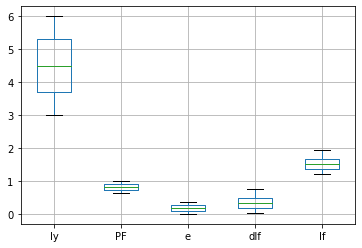

In [46]:
boxplot = df.boxplot(column=['Iy', 'PF', 'e', 'dIf', 'If'])

In [48]:
df.head()

,Iy,PF,e,dIf,If
0,3.0,0.66,0.34,0.383,1.563
1,3.0,0.68,0.32,0.372,1.552
2,3.0,0.70,0.30,0.360,1.540
3,3.0,0.72,0.28,0.338,1.518
4,3.0,0.74,0.26,0.317,1.497


In [88]:
corr_matrix = df.corr()
print(corr_matrix['If'].sort_values(ascending=False))

If     1.000000
dIf    1.000000
e      0.861013
Iy     0.424945
PF    -0.861013
Name: If, dtype: float64


In [89]:
#avoid target leakage
df.drop('dIf', axis = 1, inplace = True)

In [90]:
y = df['If']
X = df.copy()
X.drop('If',axis = 'columns', inplace = True)

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,shuffle= True)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Coefficients: 
 [ 2.39487852e-01 -5.24869938e+13 -5.24869938e+13]
Mean squared error: 0.005
Coefficient of determination: 0.87


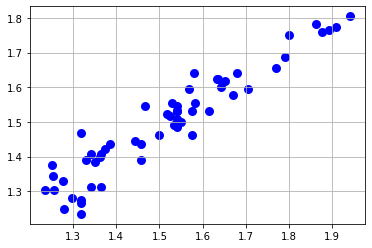

In [103]:
# Create linear regression object
regr =  LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print('Mean squared error: {:.3f}'.format(mean_squared_error(y_test,y_pred)))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(y_test, y_pred, color="blue", linewidth=3)
plt.grid()
plt.show()